## multi version regression

In [1]:
import numpy as np

In [3]:
x= np.array([1,2,3])
print(x)
print(np.diag(x))
M= np.random.normal(0,1,(2,3))
N= np.random.normal(0,1,(3,4))
print(np.matmul(M,N).round(3))
print((M@N).round(3))

[1 2 3]
[[1 0 0]
 [0 2 0]
 [0 0 3]]
[[-0.534 -0.161  3.088  0.623]
 [-1.171 -0.226  3.446  0.456]]
[[-0.534 -0.161  3.088  0.623]
 [-1.171 -0.226  3.446  0.456]]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
np.random.seed(0)
plt.style.use('seaborn')

# set params
N, n_feature = 32, 5
lr = 0.03
t_W = np.random.uniform(-1, 1, n_feature).reshape(-1, 1)
t_b = np.random.uniform(-1, 1, 1)
W = np.random.uniform(-1, 1, n_feature).reshape(-1, 1)
b = np.random.uniform(-1, 1, 1).reshape(1, 1)
epochs = 100

# generate dataset
X = np.random.randn(N, n_feature)
Y = X @ t_W + t_b


J_list = list()
W_list, b_list = list(), list()

for epoch in range(epochs):
    W_list.append(W)
    b_list.append(b)
    
    # loss calculation
    Pred = X @ W + b
    J0 = (Y - Pred)**2
    J = np.mean(J0)
    J_list.append(J)
    
    # jacobians
    dJ_dJ0 = 1/N*np.ones((1, N))
    dJ0_dPred = np.diag(-2*(Y - Pred).flatten())
    dPred_dW = X
    dPred_db = np.ones((N, 1))
 
    # backpropagation
    dJ_dPred = dJ_dJ0 @ dJ0_dPred
    dJ_dW = dJ_dPred @ dPred_dW
    dJ_db = dJ_dPred @ dPred_db
 
    # parameter update
    W = W - lr*dJ_dW.T
    b = b - lr*dJ_db
W_list = np.hstack(W_list)
b_list = np.concatenate(b_list)

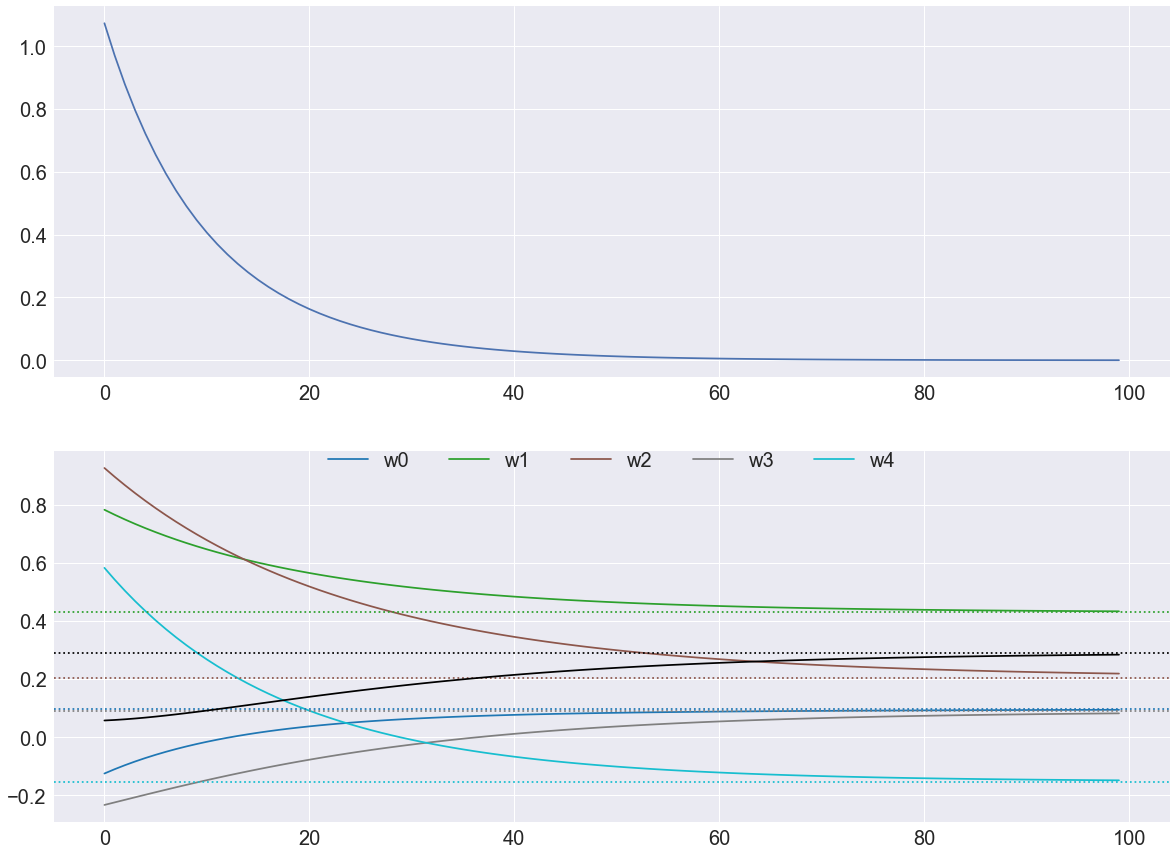

In [5]:
# visualize results
cmap = cm.get_cmap('tab10', n_feature)
fig, axes = plt.subplots(2, 1, figsize=(20, 15))
axes[0].plot(J_list)
for w_idx, w_list in enumerate(W_list):
 axes[1].plot(w_list, color=cmap(w_idx), label='w' + str(w_idx))
for w_idx, t_w in enumerate(t_W):
 axes[1].axhline(y=t_w, linestyle=':', color=cmap(w_idx))
axes[1].plot(b_list, color='black')
axes[1].axhline(y=t_b, linestyle=':', color='black')
axes[1].legend(fontsize=20, loc='lower center', bbox_to_anchor=(0.5, 0.9), ncol=n_feature)
axes[0].tick_params(labelsize=20)
axes[1].tick_params(labelsize=20)

## multi version logistic

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
np.random.seed(1)
plt.style.use('seaborn')

# set params
N, n_feature = 500, 3
lr = 0.01
t_W = np.random.uniform(-1, 1, n_feature).reshape(-1, 1)
t_b = np.random.uniform(-1, 1, 1)
W = np.random.uniform(-1, 1, n_feature).reshape(-1, 1)
b = np.random.uniform(-1, 1, 1).reshape(1, 1)
epochs = 100

# generate dataset
X = np.random.normal(0, 1, (N, n_feature))
Y = X @ t_W + t_b
Y = (Y > 0).astype(np.int)
J_track = list()
acc_track = list()

for epoch in range(epochs):
    # forward Ppropagation
    Z = X @ W + b
    Pred = 1/(1 + np.exp(-Z))
    J0 = -(Y*np.log(Pred) + (1-Y)*np.log(1-Pred))
    J = np.mean(J0)
    J_track.append(J)
 
    # calculate accuracy
    Pred_ = (Pred > 0.5).astype(np.int)
    n_correct = (Pred_ == Y).astype(np.int)
    acc = np.sum(n_correct)/N
    acc_track.append(acc)

    # jacobians
    dJ_dJ0 = 1/N*np.ones((1, N))
    dJ0_dPred = np.diag(((Pred - Y)/(Pred*(1-Pred))).flatten())
    dPred_dZ = np.diag((Pred*(1-Pred)).flatten())
    dZ_dW = X
    dZ_db = np.ones((N, 1))
 
    # backpropagation
    dJ_dPred = dJ_dJ0 @ dJ0_dPred
    dJ_dZ = dJ_dPred @ dPred_dZ
    dJ_dW = dJ_dZ @ dZ_dW
    dJ_db = dJ_dZ @ dZ_db
 
    # parameter update
    W = W - lr*dJ_dW.T
    b = b - lr*dJ_db

Text(0, 0.5, 'Accumulated Accuracy')

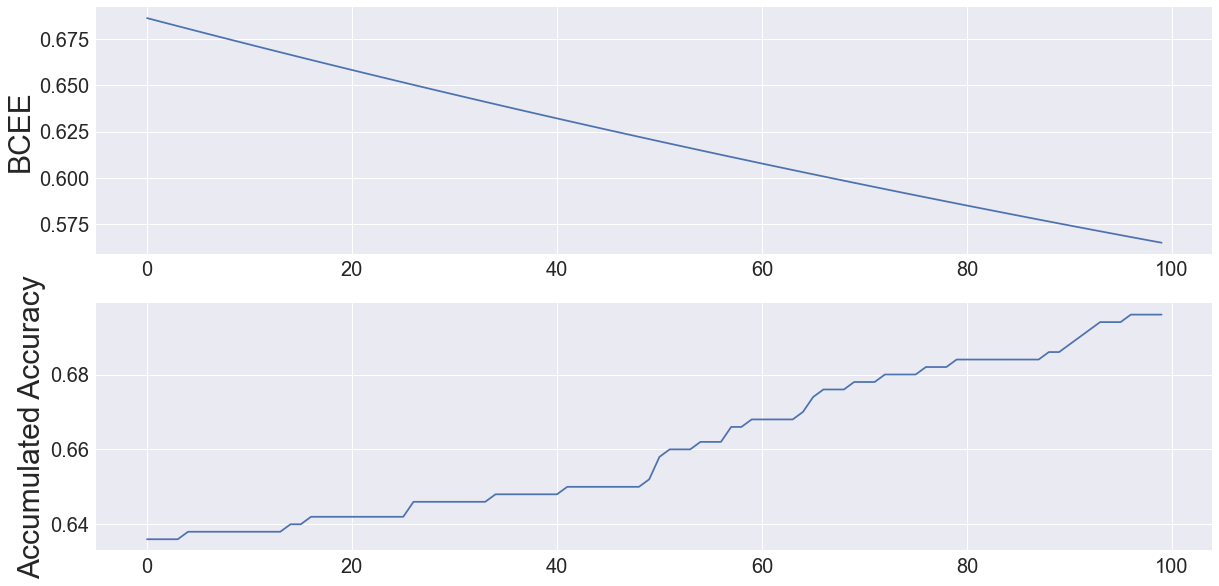

In [2]:
# visualize loss
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
axes[0].plot(J_track)
axes[0].set_ylabel('BCEE', fontsize=30)
axes[0].tick_params(labelsize=20)
axes[1].plot(acc_track)
axes[1].tick_params(labelsize=20)
axes[1].set_ylabel('Accumulated Accuracy', fontsize=30)